# Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Preprocess Data

In [12]:
df = pd.read_csv('../playground-series-s4e2/train.csv')
df.drop('id', axis=1, inplace = True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
# Encode multicategorical features (one-hot encoding) and label encode the target variable
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
target = 'NObeyesdad'

# Label Encoding for the target (multi-class)
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

# One-hot encoding for multicategorical features
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Features and target
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scales numerical features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Angel Part(KNN)

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5)

# trains model
knn.fit(X_train,y_train)

# prediction 
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy in k = {5}: {accuracy * 100:.2f}%")

Accuracy in k = 5: 84.75%


# Tony Part(Decision Tree)

# Train Models

Accuracy: 84.75%
Accuracy: 83.14%
Accuracy: 89.86%
Accuracy: 81.41%


C:\Users\Santiago\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


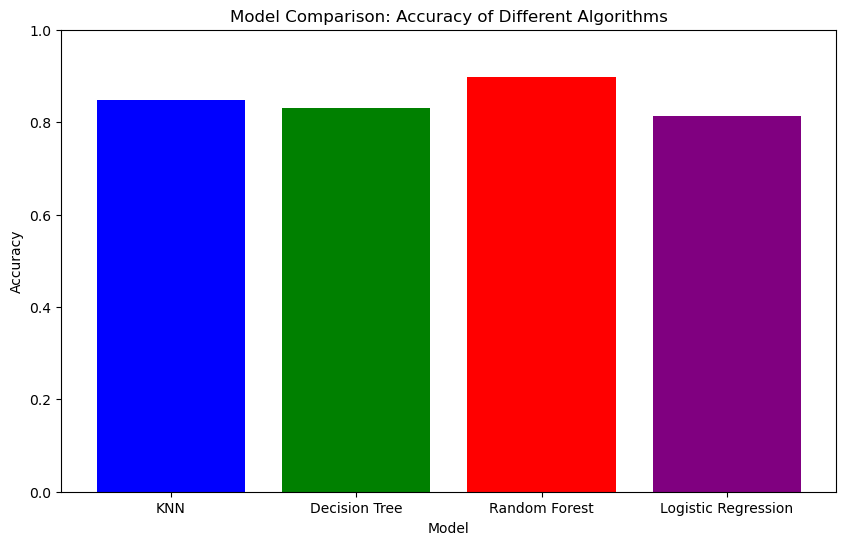

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)
dt_model = DecisionTreeClassifier(random_state=2)
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
lr_model = LogisticRegression(max_iter=1000, random_state=2)

# Define models in a dictionary for easy access
models = {
    'KNN': knn_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
}
# Store the accuracy scores
accuracy_scores = []

# Loop through each model, train it, and calculate accuracy
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    accuracy_scores.append(accuracy)

# Create a bar plot to compare the accuracy of models
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.show()

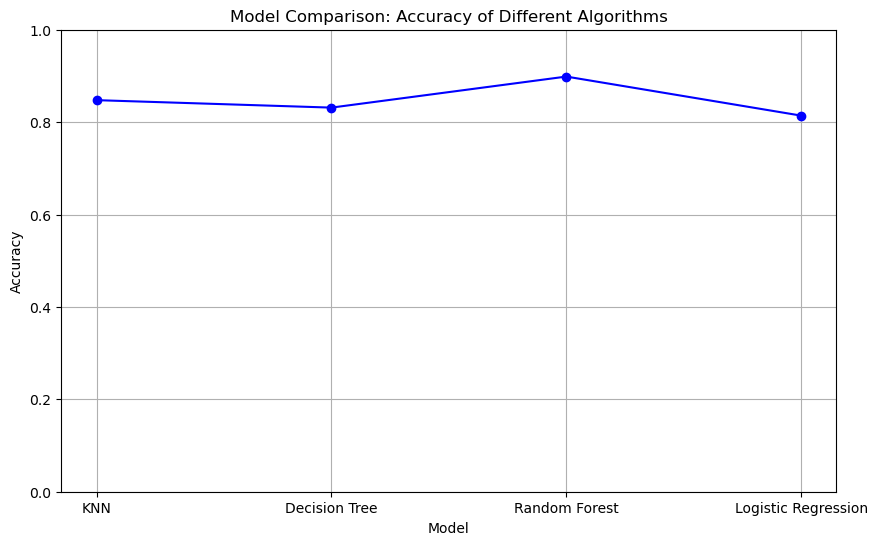

In [15]:
# Create a line plot to compare the accuracy of models
plt.figure(figsize=(10, 6))
plt.plot(models.keys(), accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.grid(True)
plt.show()